# Communicate Data Findings with the Pokemon dataset from Kaggle
 
## by Hoai-Nam Nguyen

## Preliminary Wrangling
> https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

> This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

The data for this table has been acquired from several different sites, including:

pokemon.com

pokemondb

bulbapedia

One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('datasets_121_280_Pokemon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
df.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
df['Type 2'].isnull().sum()

386

The dataset seems pretty clean already and we can ignore the null values in the "Type 2" column, as this isn't a data quality issue but just the nature of the Pokémon (some aren't multi-type). 

Row 794 with the #718 (Zygarde50% Forme) might seem like an error but after googling the name it  seems to be correct.

### What is the structure of your dataset?

> The dataset has 800 rows and 13 columns. The columns range from Name, different Types, different attributes, generation to legendary status.

### What is/are the main feature(s) of interest in your dataset?

> The dataset includes every Pokémon including their discrete attribute values and types. It basically is a database of each Pokémon.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The different attributes.

## Univariate Exploration

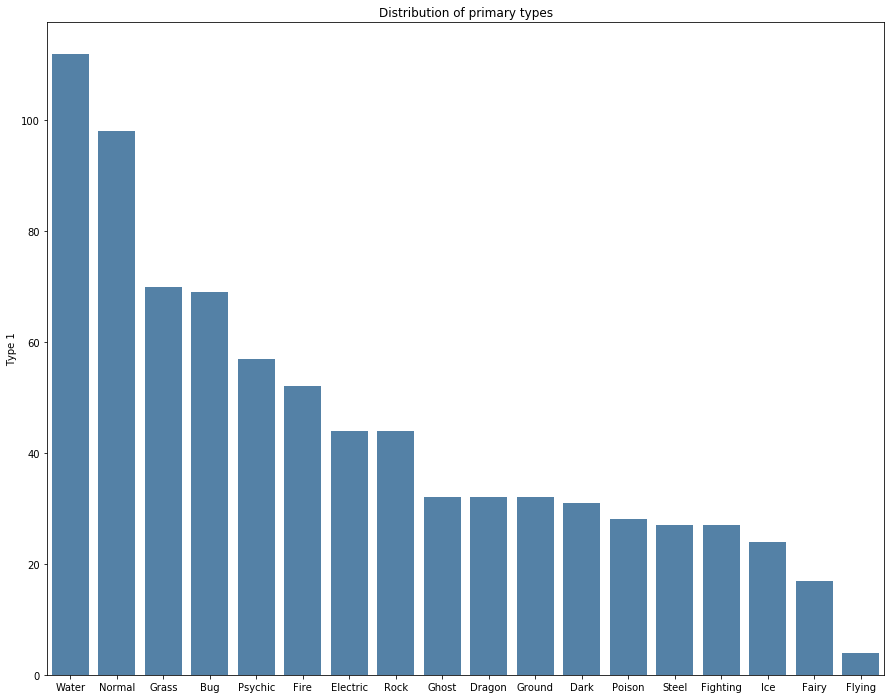

In [7]:
plt.figure(figsize=(15, 12))
plt.title('Distribution of primary types')
sns.barplot(x=df['Type 1'].value_counts().index, y=df['Type 1'].value_counts(), color = 'steelblue');

The most common Pokémon types seem to be those of type "Water", followed by "Normal" Pokémon. Surprisingly there are not that many of the type "Flying".

Next we'll look at the distribution of legendary and non-legendary Pokémon.

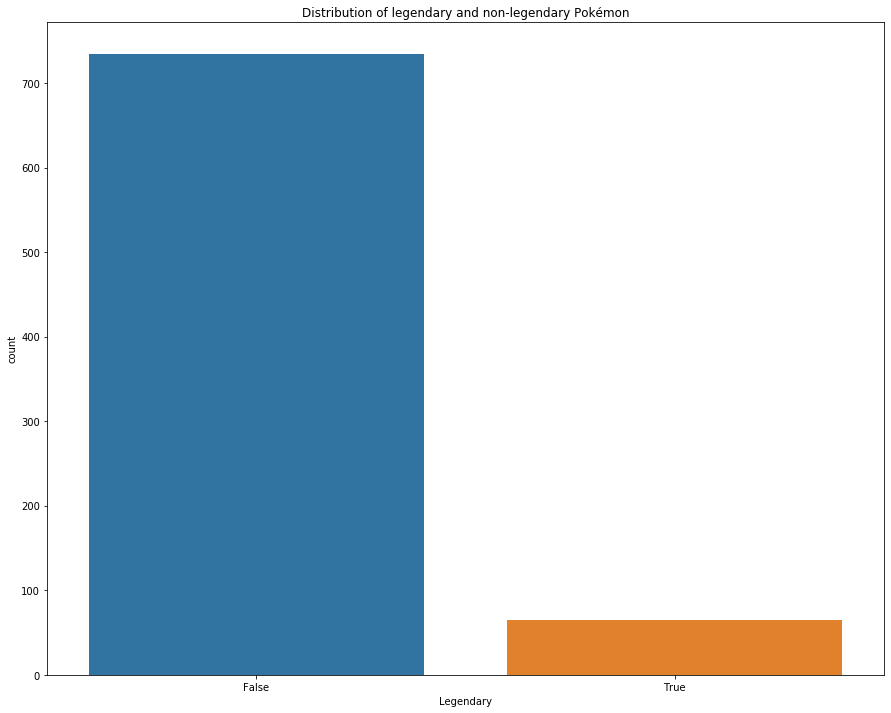

In [8]:
plt.figure(figsize=(15, 12))
plt.title('Distribution of legendary and non-legendary Pokémon')
sns.countplot(df['Legendary']);

As expected there are not that many legendary Pokémon, because they're... well legendary and rare. False bar shows normal Pokémon and True bar shows legendary Pokémon.

Next we'll look at the amount of Pokémon per Generation.

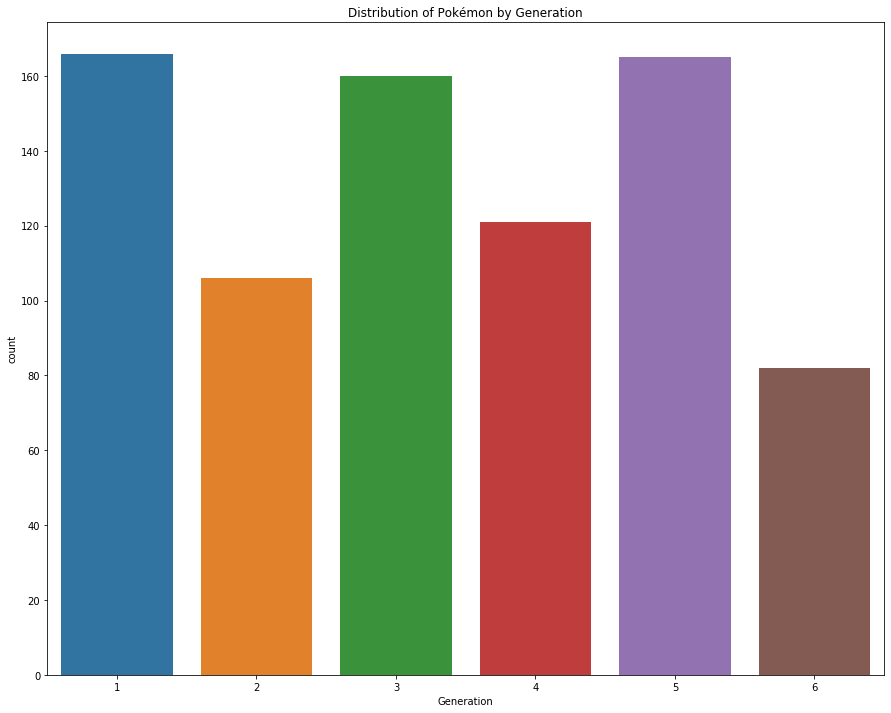

In [9]:
plt.figure(figsize=(15, 12))
plt.title('Distribution of Pokémon by Generation')
sns.countplot(df['Generation']);

In [10]:
df.query('Generation == 1')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


Looking at the graph I got confused as the first Generation usually only has 151 Pokémon. But looking at a sample (seen above) of the Generation 1 Pokémon we can see that there are Pokémon in it, which are new versions of the original Pokémon (Mega Venusaur for example) which are Pokémon of the first generation.

Next we'll look at the attributes (Total).

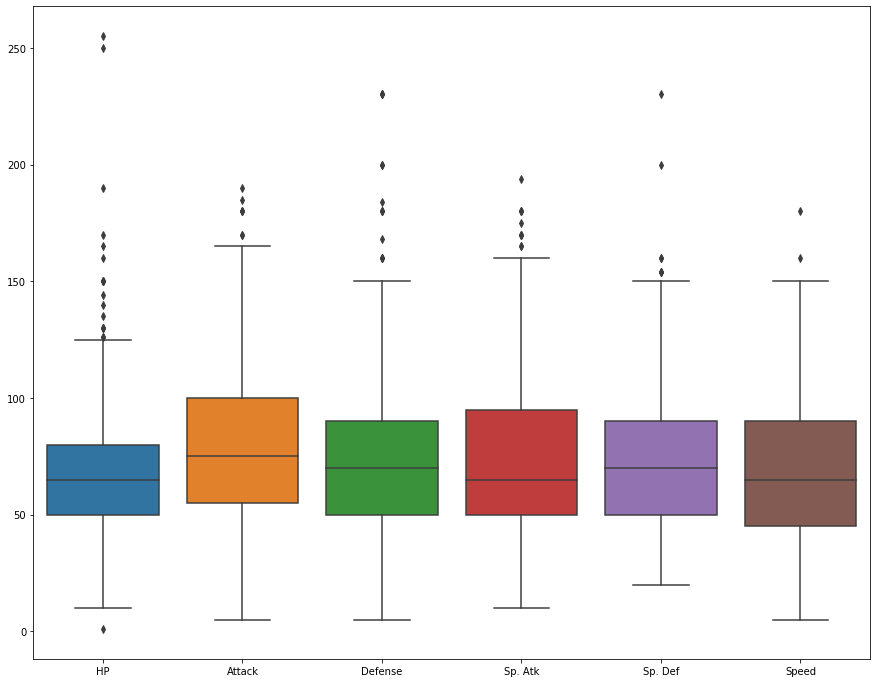

In [11]:
plt.figure(figsize=(15, 12))
sns.boxplot(data = df.drop(columns=['#', 'Total', 'Generation', 'Legendary'], axis=1));

In [12]:
df.drop(columns=['#', 'Total', 'Generation', 'Legendary'], axis=1).describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


The boxplot shows the general distribution of values for the attributes, making outliers and the typical statistical values clear (min, max, quartiles etc.).

This is underlined be the .describe() functions for the attributes.

I've only dropped the unnecessary columns in the parameter, because maybe we'll need those columns later.

In [13]:
def set_label(x_label, y_label):
    """
    This function automatically sets the x- and y-label for a graph.
    
    Input: x-label and y-label in that order
    
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)

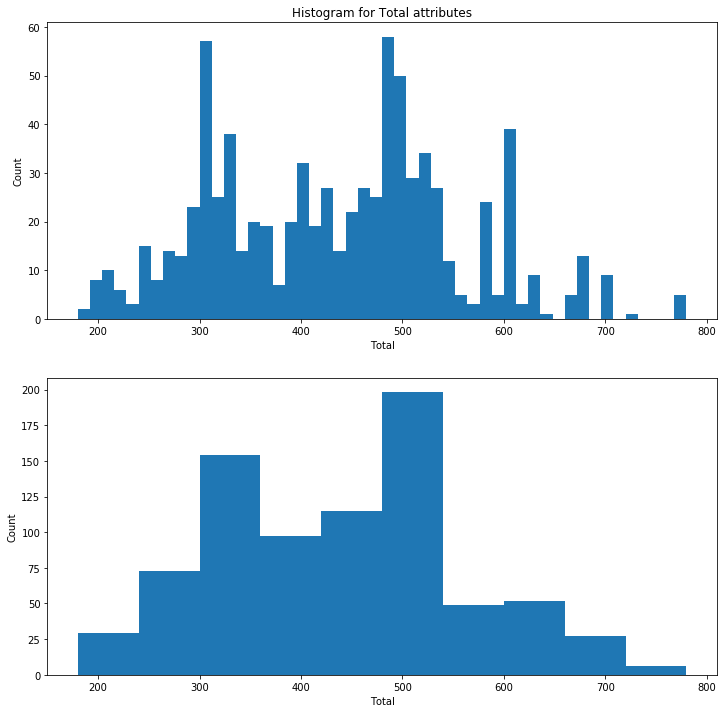

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.hist(data = df, x = 'Total', bins = 50)
set_label('Total', 'Count');
plt.title('Histogram for Total attributes')

plt.subplot(2, 1, 2)
plt.hist(data = df, x = 'Total', bins = 10)
set_label('Total', 'Count');

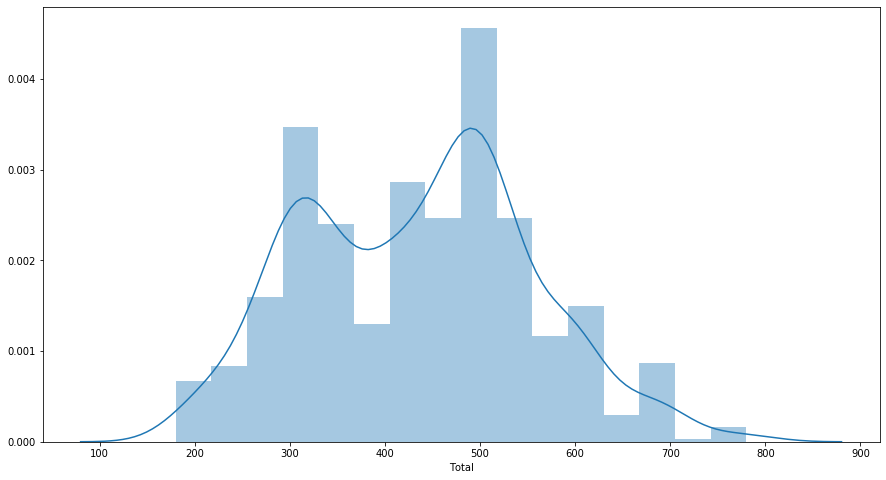

In [15]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Total']);

Above we can see the histogram for the "Total" of the Pokémon, with a bin size of 50 and a bin size of 10. 

Additionally I plotted the univariate distribution of the "Total" observations.

If I'd have to guess I'd say it is a very slightly right-skewed bivariate-distribution.

Next we'll look at the different stats.

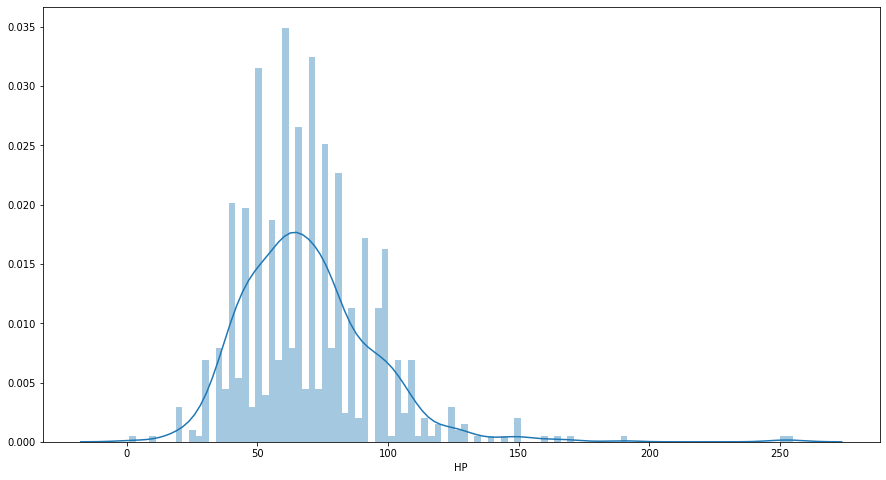

In [16]:
plt.figure(figsize=(15, 8))
sns.distplot(df['HP'], bins=100);

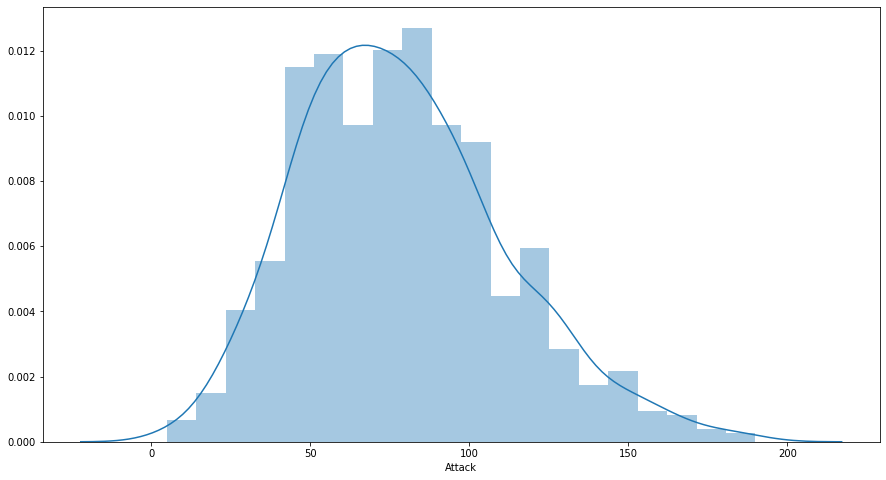

In [17]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Attack']);

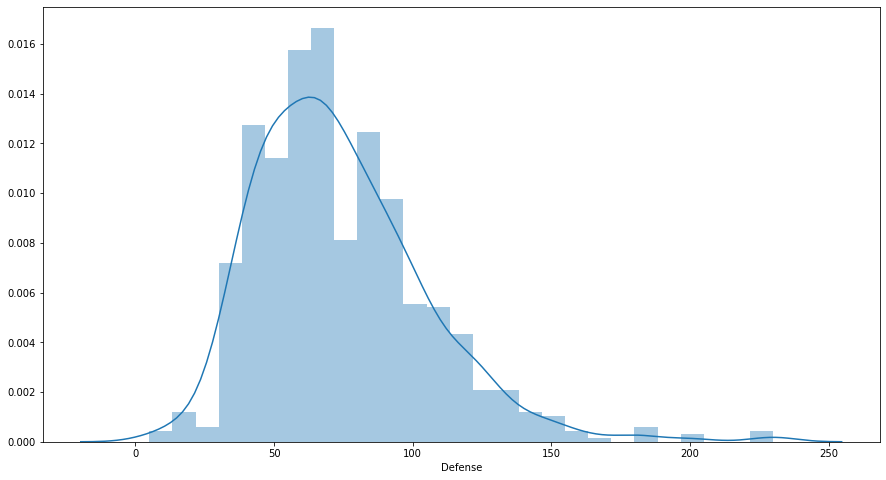

In [18]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Defense']);

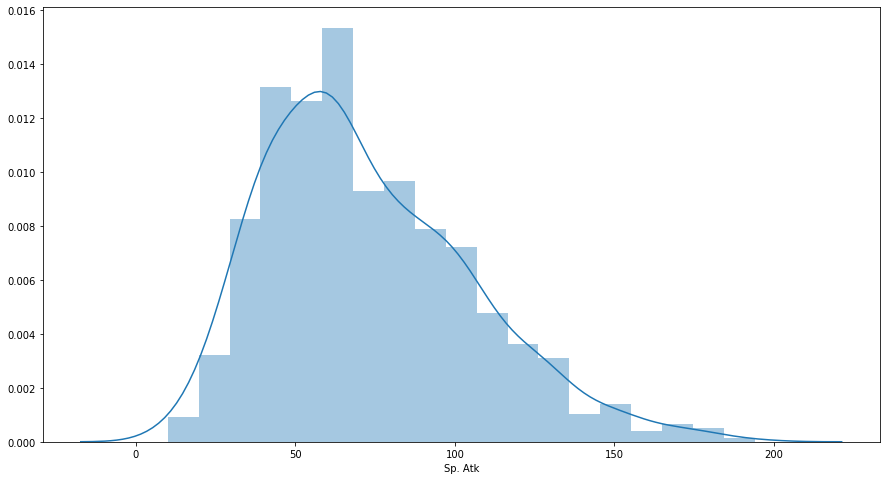

In [19]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Sp. Atk']);

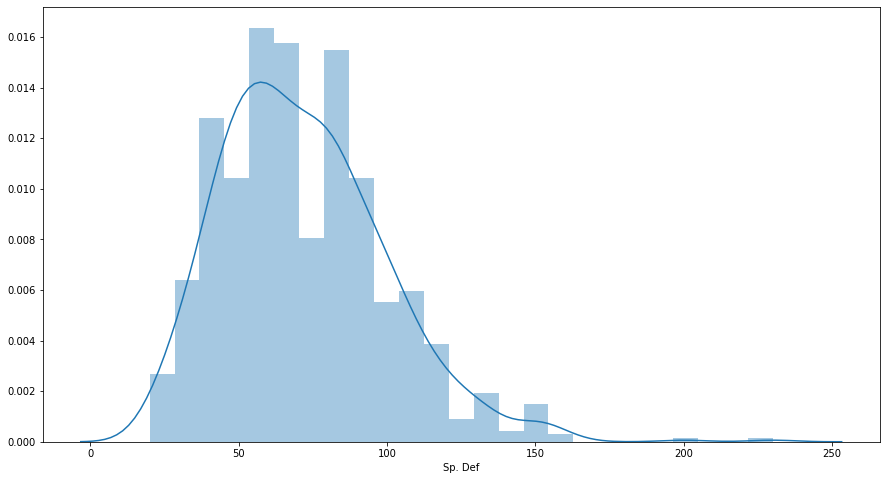

In [20]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Sp. Def']);

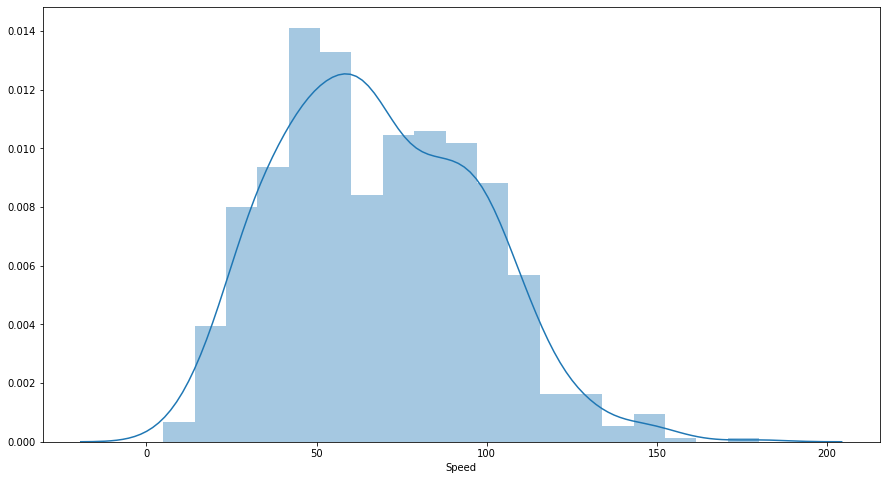

In [21]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Speed']);

The distributions for the single attributes all seem like right-skewed normal distributions, except for the "Speed", which almost like a bivariate-distribution again.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables didn't have any unusual distribution at all. The single attributes almost always had a clear normal distribution (right-skewed). The "Total" had a bivariate distribution, but this can be explained because the "Total" is just the sum of the single attributes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Same here, the dataset was very tidy and there was no need to transform or do any cleaning operations on the dataset for the univariate analysis.

## Bivariate Exploration

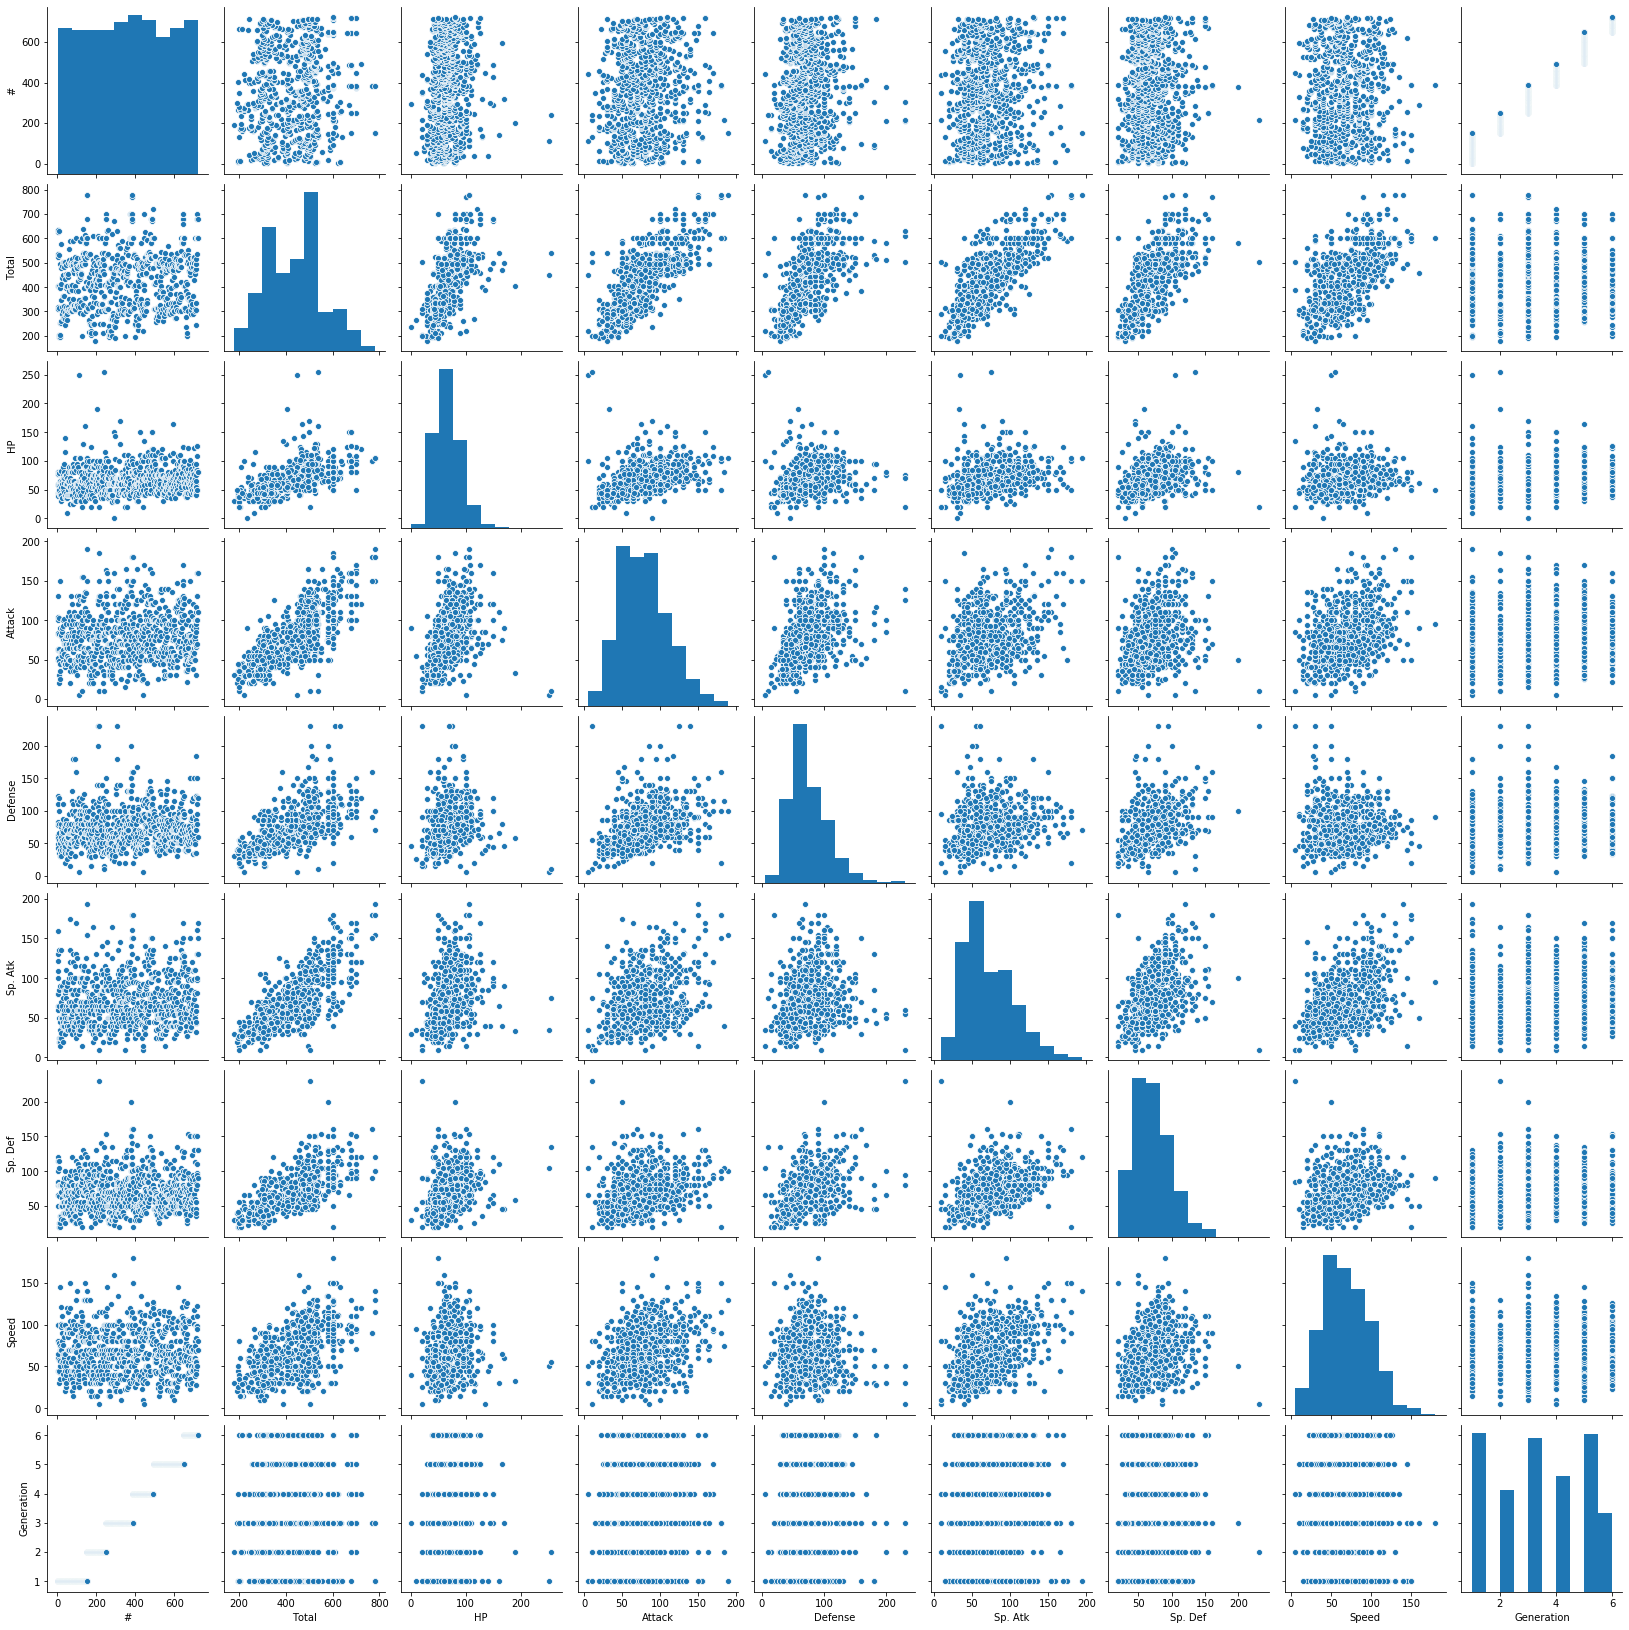

In [22]:
df_bi = df.copy()
df_bi['Legendary'] = df_bi['Legendary'].apply(lambda x: 'Legendary' if x == True else 'Not Legendary')
sns.pairplot(df_bi)

I had to convert the "Legendary" entries to non-boolean values, else the pairplot didn't work.

In this pairplot we can look at first correlations and try to look at these pairings in-depth.

As "Total" is correlated to every attribute we will ignore it.

It looks like "Attack" and "Defense" have a positive correlation, aswell as "Attack" and "Sp. Atk", "Attack" and "HP, "Sp. Atk" and "Speed", "Sp. Atk." and "Sp. Def".

In [23]:
df_bi[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',]].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


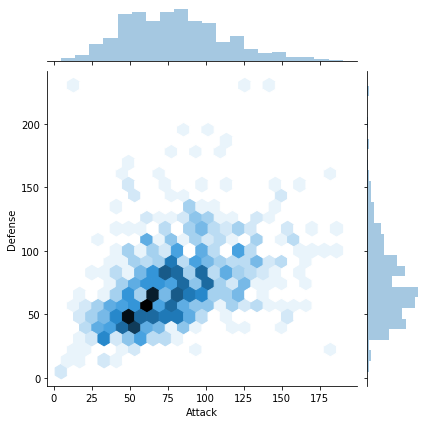

In [24]:
# Attack + Defense
sns.jointplot(x = 'Attack', y = 'Defense', data = df_bi, kind='hex');

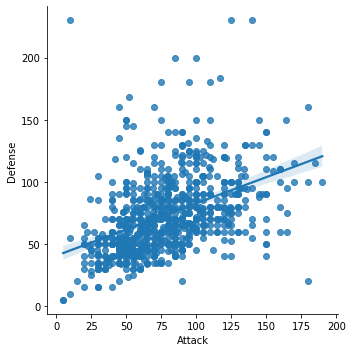

In [25]:
sns.lmplot(x = 'Attack', y  = 'Defense', data = df_bi);

This plot shows the overlapping distribution between those to attributes and we can see that the most common attribute combinations range from 50 Attack to 75 Attack and 40 Defense to 70 Defense.

The linear regression plot shows a positive correlation.

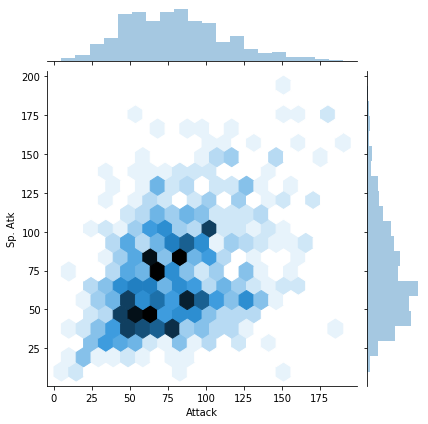

In [26]:
# Attack + Sp. Atk
sns.jointplot(x = 'Attack', y = 'Sp. Atk', data = df_bi, kind='hex');

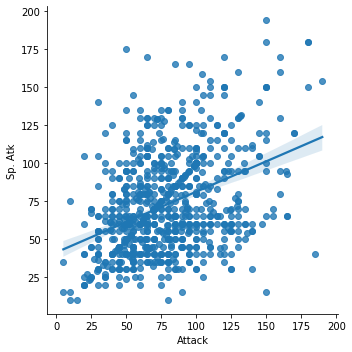

In [27]:
sns.lmplot(x = 'Attack', y  = 'Sp. Atk', data = df_bi);

Here the distribution for the most common values seems much wider, Attack ranging from 40 up to 100 and Sp. Attack ranging from 35 up to 100 aswell.

The linear regression plot shows a positive correlation.

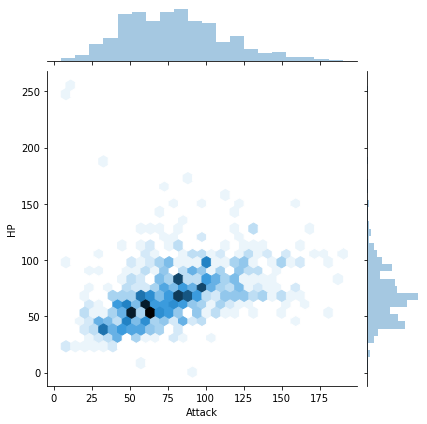

In [28]:
# Attack + HP
sns.jointplot(x = 'Attack', y = 'HP', data = df_bi, kind='hex');

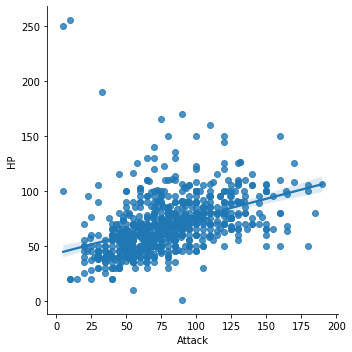

In [29]:
sns.lmplot(x = 'Attack', y  = 'HP', data = df_bi);

Here the distribution for the most common values is: Attack ranging from 50 up to 100 and HP ranging from 40 up to 100 aswell.

The linear regression plot shows a positive correlation.

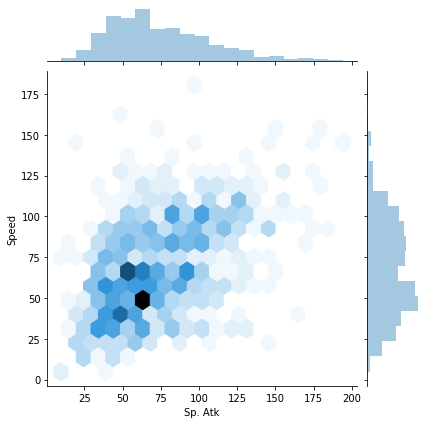

In [30]:
# Attack + Sp. Atk
sns.jointplot(x = 'Sp. Atk', y = 'Speed', data = df_bi, kind='hex');

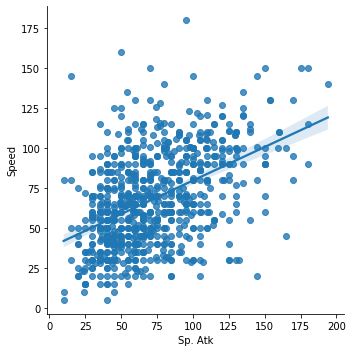

In [31]:
sns.lmplot(x = 'Sp. Atk', y  = 'Speed', data = df_bi);

This distribution has a strong focus on Sp. Atk values from 40 to 65 and associated Speed from 30 to 65.

The linear regression plot shows a positive correlation.

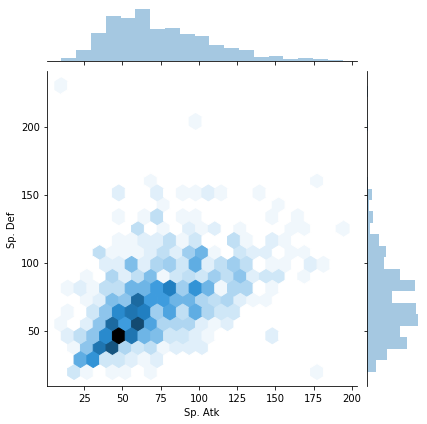

In [32]:
# Sp. Atk + Sp. Def
sns.jointplot(x = 'Sp. Atk', y = 'Sp. Def', data = df_bi, kind='hex');

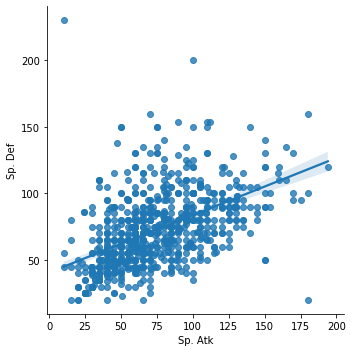

In [33]:
sns.lmplot(x = 'Sp. Atk', y  = 'Sp. Def', data = df_bi);

This distribution has a strong focus on Sp. Atk values from 30 to 65 and associated Sp. Def from 15 to 75.

The linear regression plot shows a positive correlation.

After seeing the correlations above we can now say that on average the more Attack a Pokémon has, the more Defense it has aswell.

This goes for all the other tested attribute combinations aswell.

Next we'll look at the distribution of Pokémon primary types by Generation.

<Figure size 1080x864 with 0 Axes>

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

'\n    This loop loops over the axes of the chart, \n    gets the ticklabels of the charts on the x-axis and \n    rotates them to make them more readable.\n    '

<Figure size 1080x864 with 0 Axes>

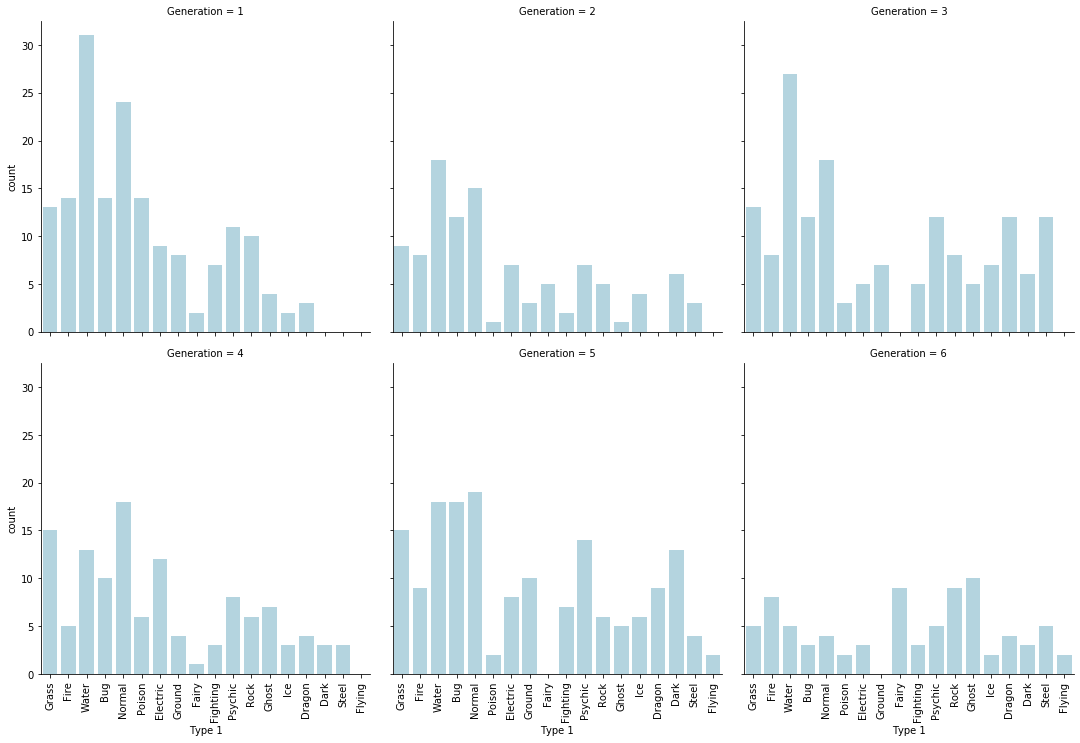

In [34]:
plt.figure(figsize=(15, 12))

chart = sns.catplot(x='Type 1', col='Generation', col_wrap=3, data=df_bi, kind='count', color='lightblue')

for ax in chart.axes.flat:
    """
    This loop loops over the axes of the chart, 
    gets the ticklabels of the charts on the x-axis and 
    rotates them to make them more readable.
    """
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Distribution of Pokémon types by Generation. There seems to be no clear distribution visible, only that (as we already saw in the univariate analysis) that Water types often are higher in number. Generation 6 seems to have the least amount of Pokémon overall, with no big spikes in any type. Generation 1 and Genration 3 have a very big spike in Water and normal Pokémon.

Next we'll look at the evolution of attributes over time (Generations).

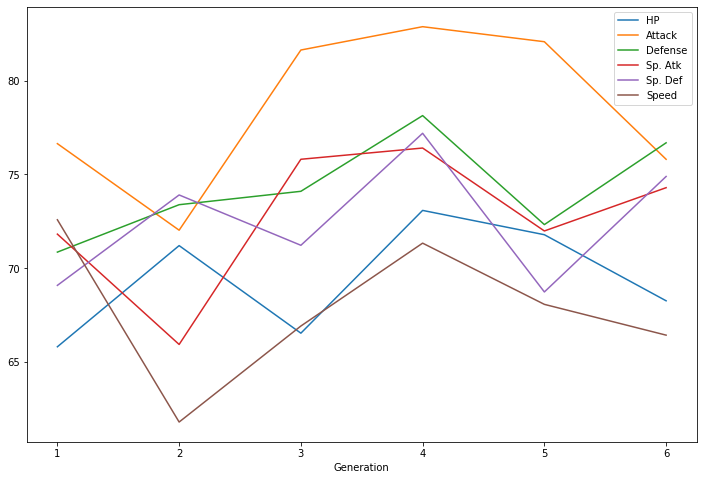

In [35]:
avg_attributes = df_bi.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
avg_attributes.plot(figsize=(12, 8), kind='line');

There seems to be no trend in the evolution of attributes over the Generations. Generation 2 has a dip in Attack, Sp. Atk and Speed, but a high in Sp. Def and HP. Seemed to be more focused on the defensive side of the game!

Generation 5 has a dip in Defense, Sp. Def and Sp. Atk - while HP, Attack, Speed don't dip as deep.

Lastly we'll look at the legendary Pokémon across the Generations.

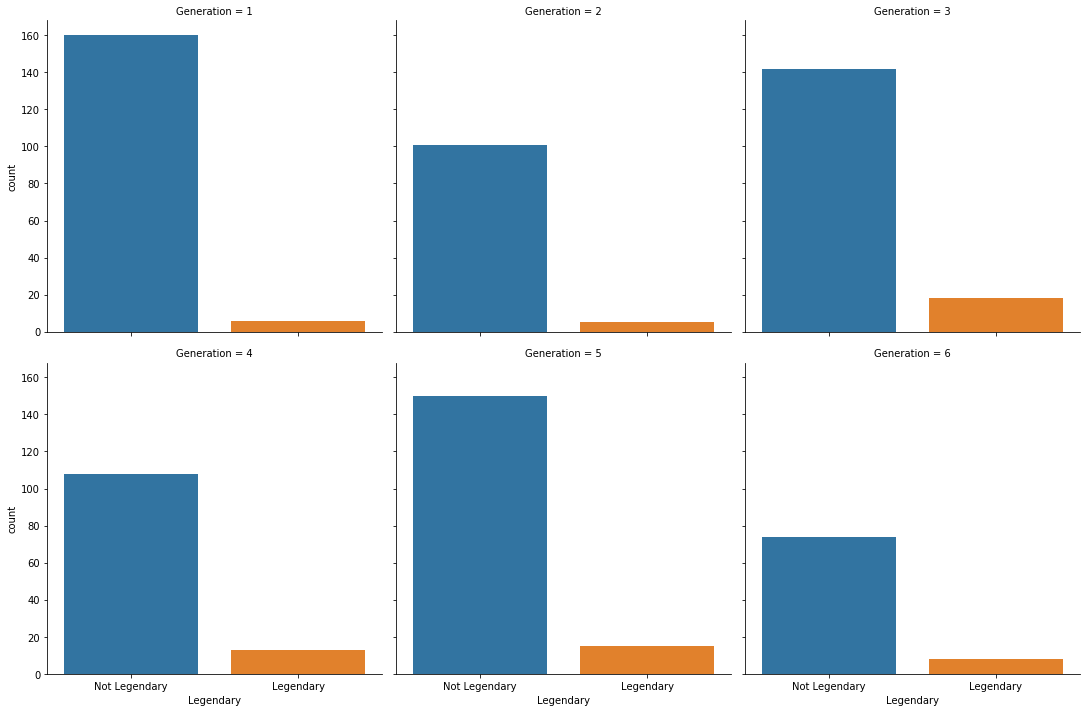

In [36]:
sns.catplot(x = 'Legendary', col = 'Generation', data = df_bi, kind = 'count', col_wrap = 3)

There seems to be nothing out of the ordinary here, no Generation has "too much" legendaries.

In [37]:
avg_attributes_legendary = df.groupby('Legendary').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
avg_attributes_legendary = avg_attributes_legendary[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].reset_index()
avg_attributes_legendary

,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,False,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
1,True,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


Legendary Pokémon on average have higher attributes than normal Pokémon!

After seeing this I've decided to additionally look what the Pokémon with the highest attributes (Total) is and if it's a legendary Pokémon.

In [38]:
df_bi.sort_values('Total', ascending=False)[:20]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,Legendary
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,Legendary
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,Legendary
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,Legendary
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,Not Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,Not Legendary


In [39]:
df_bi.sort_values('Total', ascending=False)[:20]['Legendary'].values

array(['Legendary', 'Legendary', 'Legendary', 'Legendary', 'Legendary',
       'Legendary', 'Legendary', 'Legendary', 'Not Legendary',
       'Not Legendary', 'Legendary', 'Legendary', 'Not Legendary',
       'Not Legendary', 'Legendary', 'Legendary', 'Legendary',
       'Legendary', 'Legendary', 'Legendary'], dtype=object)

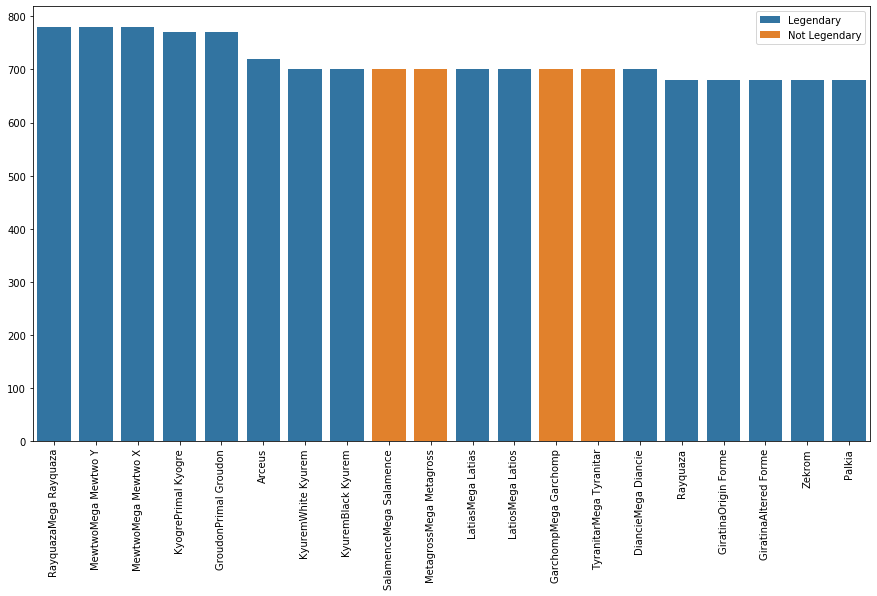

In [40]:
plt.figure(figsize=(15, 8))
chart = sns.barplot(x=df_bi.sort_values('Total', ascending=False)[:20]['Name'].values, y=df_bi.sort_values('Total', ascending=False)[:20]['Total'].values, hue=df_bi.sort_values('Total', ascending=False)[:20]['Legendary'].values, dodge=False)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90) ;

Legendary Pokémon definitely are stronger than normal Pokémon on average. Out of the top 20 Pokémon with highest Total values there are only 4 Pokémon which are not legendary.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some features have a positive relationship with each other, as I mentioned above.

> Additionally there seems to be no trend across the different Generations or at least no visible trend regarding attributes or Pokémon types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was surprised that legendary Pokémon had higher attributes than normal Pokémon! Although I've only played the first two games in my childhood I was always under the impression that the legendary birds were not as strong. The last analysis confirms this, as in the top 20 Pokémon ranked by Total "strength" there are only 4 non-legendary Pokémon.

## Multivariate Exploration

In [41]:
df_bi

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Not Legendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Not Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Not Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Not Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Not Legendary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Legendary
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Legendary
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,Legendary


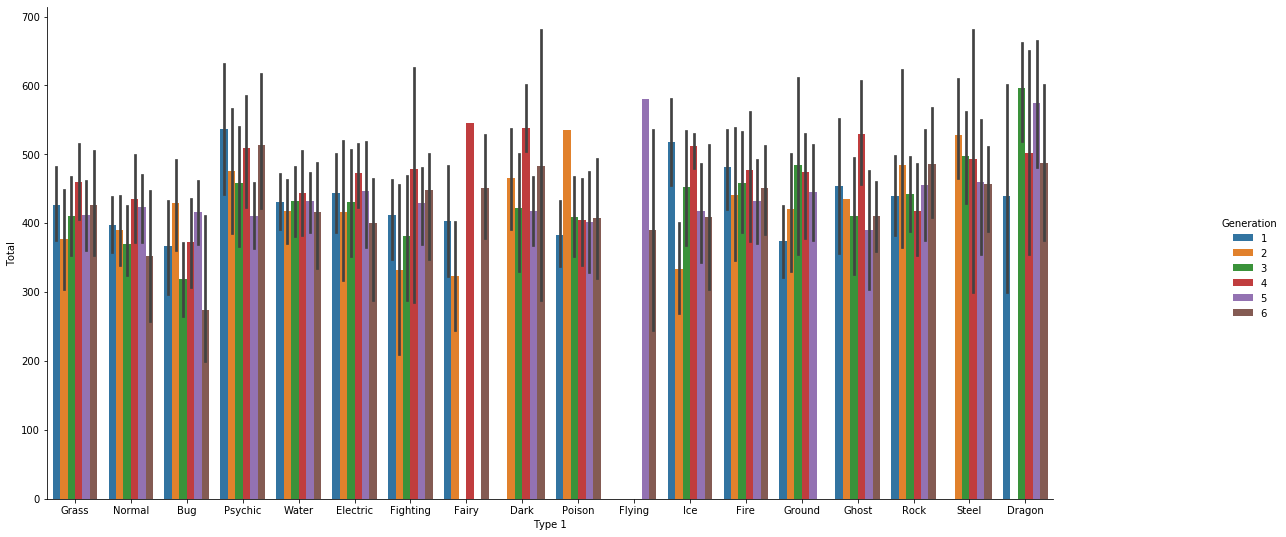

In [42]:
chart = sns.catplot(x = 'Type 1', y = 'Total', hue = 'Generation', data = df_bi.sort_values('Total'), kind='bar')
chart.fig.set_size_inches(20, 8);

Here we can see the different primary types as a grouped bar-chart with the confidence interval in it.

The values are the Totals grouped by the primary type and the generation.

What's interesting is that Flying as a primary type have only been introduced in Generation 5, guessing that before they were always secondaries. 

Fairies were not used in Generation 3 and 5 at all, which is strange aswell. 

Dragons where not used in Generation 2 as primary types aswell.

The strongest types seem to be Psychics in Generation 1, 

Fairys in Generation 4, 

Dark in Generation 4, 

Poison in Generation 2,

Flying in Generation 5,

Ice in Generation 1 and 4,

and Dragon in Generation 3 and 5.


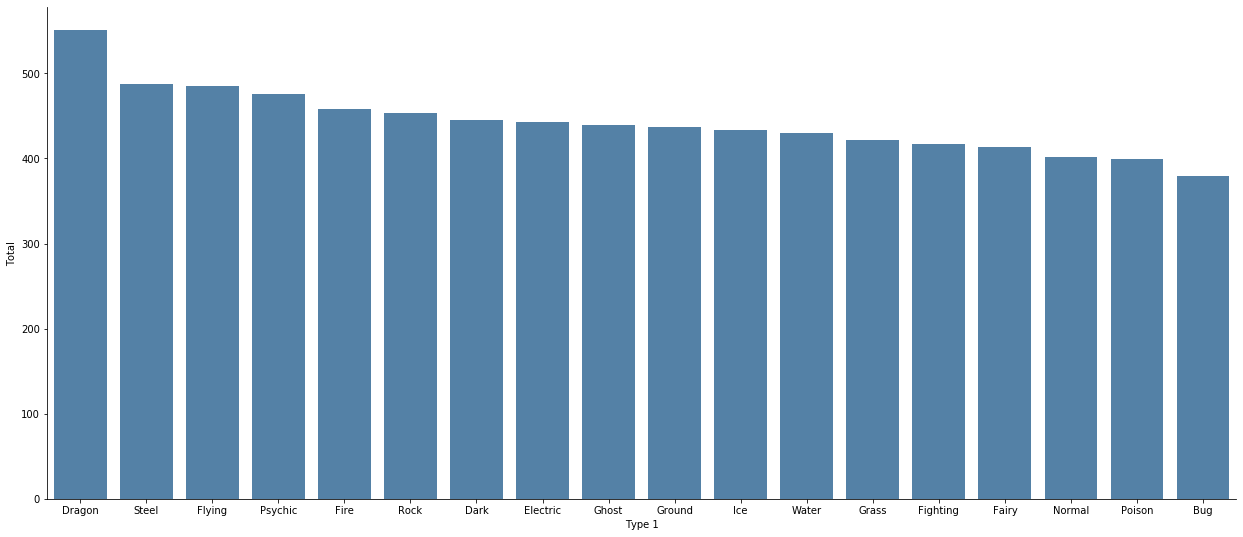

In [43]:
chart = sns.catplot(x = 'Type 1', y = 'Total', data = df_bi.groupby(['Type 1']).mean().sort_values('Total', ascending=False).reset_index(), kind='bar', color = 'steelblue')
chart.fig.set_size_inches(20, 8);

Without regard to the Generation, Dragon types seem to be the strongest with the highest overall Total.

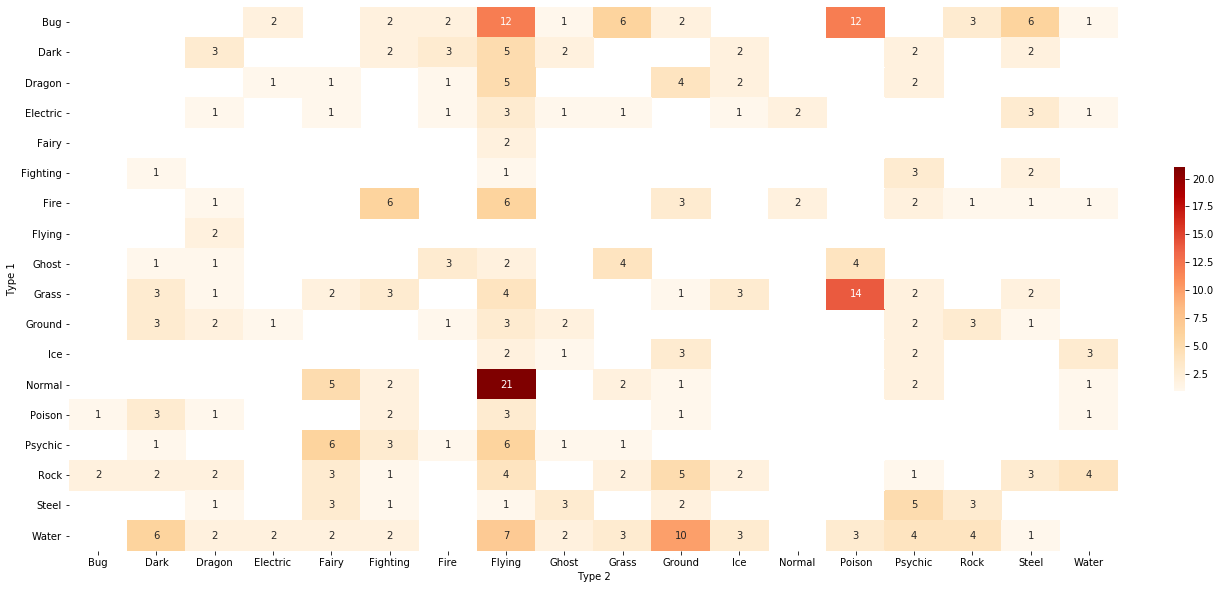

In [44]:
df_heatmap = df_bi.pivot_table(values='Total', index='Type 1',columns='Type 2', aggfunc = lambda x: len(x.unique()))

fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df_heatmap, ax=ax, cmap='OrRd', cbar_kws={'fraction' : 0.01}, annot=True)

Above we can see the Heatmap of the Pokémon types. How to read it: on the y-axis you choose the primary type and then you look on the x-axis for the corresponding secondary type. 

For example Normal types most often have the Flying as the secondary type.

Additionally we can see that bug types are often Flying or Poison types aswell. 

Primary Grass Pokémon are often Poison aswell.

Another thing I noticed is that the Flying type is most often used as a secondary type and very rarely as a primary type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some primary Pokémon types have not been introduced until later or have some Generations with no occurence of them at all (like Flying, Fairies, Dragons etc. - see above).
Overall the strongest Pokémon type seems to be the Dragon type, having the highest overall average Total across the Generations.

>Additionally we could see in the Heatmap that some of the combinations (primary + secondary type) occur more often than others, like Normal and Flying being the most common combination, while the Flying type alone is rarely a primary type combined with another type.

### Were there any interesting or surprising interactions between features?

> I was surprised about some Pokémon types not being represented in some Generations at all. 

> Also the above mentioned combinations surprised me, that Pokémon are very rarely Flying as a primary type.